# 第二章 感知机

- 感知机 **Perceptron** 是二分类的线性分类模型，输入是实例的特征向量，输出是实例的类别，取值 +1 和 -1

- 感知机对应于输入空间的特征空间中将实例划分为正类和负类的分离超平面，属于判别模型

- 感知机学习算法具有简单而且易于实现的优点，分为原始形式和对偶形式

- 感知机 1957 年由 Rosenblatt 提出，是神经网络和支持向量机的基础


## 2.1 感知机模型

- 输入空间对应的特征空间 $\chi \subseteq R^n$

- 输出空间 $Y = \{+1, -1\}$

- 假设空间是定义在特征空间中的所有线性分类模型 **linear classification model** 或线性分类器 **linear classifier** 即函数集合 $\{ f | f(x) = w \cdot x + b \}$

- 由输入空间到输出空间的映射：$f(x) = sign(w \cdot x + b)$，其中 w，b 为感知机模型参数；$w \in R^n$ 称为权值 **weight** 或者权值向量 **weight vector**，$b \in R$ 称为偏置 **bias**；$w \cdot x$ 表示 w 与 b 的内积运算；sign 表示符号函数：$sign(x) = \begin{cases}
+1 & \text{if } x \geq 0 \\
-1 & \text{if } x < 0
\end{cases} $

- 感知机几何解释，线性方程：$w \cdot x + b = 0$ 对应于特征空间 $R^n$ 中的一个分离超平面 S ，其中 w 是超平面的法向量，b 是超平面的截距；该分离超平面将特征空间划分为两个部分


## 2.2 感知机学习策略

- 数据集的线性可分性，存在某一个超平面将数据集中的正实例和负实例完全正确的划分到超平面的两侧，称为该数据集为线性可分数据集 **linearly separable data set**

- $T = \{(x_1,y_1), (x_2,y_2), \dots, (x_i,y_i), \dots, (x_n,y_n)\}$

- 对每一个 $y_i = +1$ 的实例 i，都有 $w \cdot x_i + b > 0$; 对每一个 $y_i = -1$ 的实例 i，都有 $w \cdot x_i + b < 0$;

- 损失函数选择误分类点到超平面的总距离，$L(w, b)$ 是连续可导函数，并且易于优化

- **loss function**：$L(w, b) = - \sum \limits_{x_i \in M} y_i(w \cdot x + b)$，其中 M 为误分点的集合


## 2.3 感知机的学习算法

- 最优化问题，随机梯度下降算法 **stochastic gradient descent, SGD**

- 感知机学习算法：**原始形式**、**对偶形式**

- 这种学习算法有一种直观的解释：当一个实例点被误分类，即位于分离超平面的错误一侧时，则调整 w, b 的值，使分离超平面向该分类点的一侧移动，以减少该误分类点与超平面间的距离，直至超平面越过该误分类点使其被正确分类

- 感知机学习算法由于采用不同的随机初始值或者选取不同的误分类点，所求的解是不同的，解的多样性

- **算法的收敛性，【定理 2.1】**，经过有限次迭代可以得到一个将训练数据集完全正确划分的分离超平面以及感知机模型

- 感知机学习算法存在许多解，依赖于初值的选择，也依赖于迭代过程中误分类点的选择顺序，为了得到唯一的超平面，需要增加约束条件

- 当训练集线性不可分，感知机学习算法不收敛，迭代结果会发生震荡


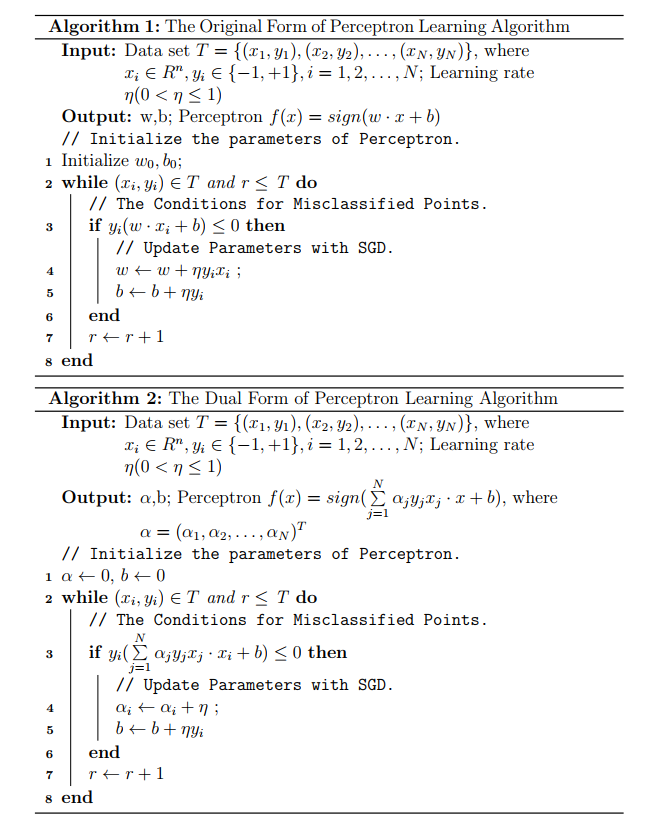

In [1]:
# ![algorithm](./image/algorithm1.png)

from IPython.display import Image, display
display(Image(filename='./image/algorithm1.png', embed=True))

## 习题

### 习题 2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**Solution**

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 


### 习题 2.2
&emsp;&emsp;模仿例题 2.1 ，构建从训练数据集求解感知机模型的例子。

### 习题 2.3
&emsp;&emsp;证明一下定理：样本集线性可分的充分必要条件是正实例点集所构成的凸壳与负实例点集所构成的凸壳互不相交。

设集合 $S \subset R^n$ 是由 $R^n$ 中的 k 个点所组成的集合，即 $S = \{ X_1, X_2, \dots, x_k \}$. 定义 S 的凸壳 conv(S) 为：

$conv(S) = \{ x = \sum \limits_{i=1}^{k} \lambda_i x_i | \sum \limits_{i=1}^{k} \lambda_i, \lambda_i \geq 0, i = 1,2,\dots,k \}$


## Code
- 鸢尾花分类


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# pip install scikit-learn
from sklearn.datasets import load_iris

# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
print(df.shape)

# 特征空间 
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

(150, 5)


2    50
1    50
0    50
Name: label, dtype: int64

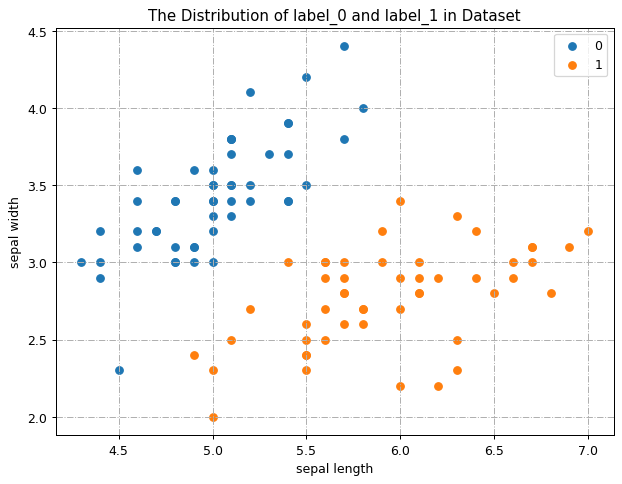

In [7]:
fig = plt.figure(figsize = (8,6), dpi = 90)
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.title("The Distribution of label_0 and label_1 in Dataset")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.grid(True, linestyle='-.')
plt.legend()


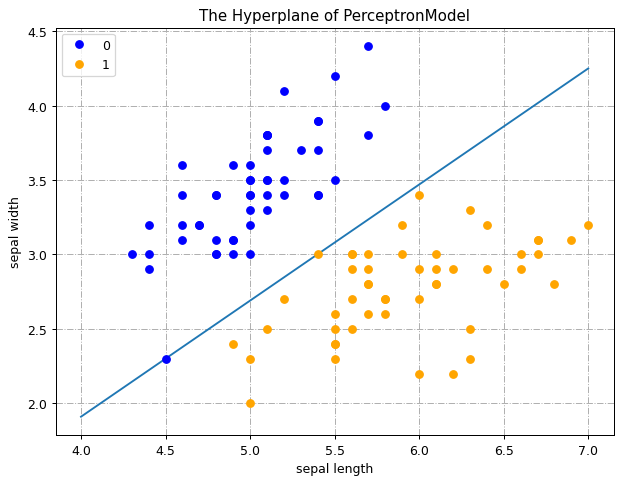

In [9]:
# 获取 Dataset 中前两个 label 的数据
data = np.array(df.iloc[:100, [0, 1, -1]])

# 将数据集中的 输入空间 和 输出空间 分离
X, y = data[:,:-1], data[:,-1]

# 将输出空间的类别，重新标记为 正类 1；负类 -1
y = np.array([1 if i == 1 else -1 for i in y])

# 数据线性可分，二分类数据
# 创建 感知机模型
class PerceptronModel:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.learning_rate = 0.01

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # SGD
    def fit_SGD(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.learning_rate * np.dot(y, X)
                    self.b = self.b + self.learning_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'


# 实例化一个感知机对象
perceptron = PerceptronModel()
perceptron.fit_SGD(X, y)

fig = plt.figure(figsize = (8,6), dpi = 90)
# 绘制分离超平面 S
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title("The Hyperplane of PerceptronModel")
plt.grid(True, linestyle='-.')
plt.legend()